In [3]:
from qtable import QTable
from Gridworld2 import GridWorld2
import numpy as np
action_list = [ "left", "right"] #"up", "down",

In [5]:
g = GridWorld2((1,5),goal=(0,4),trap=(0,0),start=(0,1))
g.display()

[['-', 'P', ' ', ' ', '+']]

In [6]:
model = QTable(action_list)
def train(max_step:int=100):
    env = GridWorld2((1,5),goal=(0,4),trap=(0,0),start=(0,1))
    holde_reward = 0
    for i in range(max_step):
        state = tuple(np.array(env.display()).flatten())
        action = model.choose_action(state)
        hit_wall = not (env.move(action))
        reward = env.calculate_reward()
        done = False
        if abs(reward) == 10:
            done = True
        # if hit_wall:
            # print("hit wall",env.display())
            # reward = -5
        holde_reward += reward
        next_state = tuple(np.array(env.display()).flatten())
        
        model.learn(state, action, reward, next_state,done)
        if done:
            break
    return holde_reward

In [10]:
train()

8

In [12]:
from tqdm import tqdm
history = []
for i in tqdm(range(1000)):
    history.append(train()) 

100%|██████████| 1000/1000 [00:00<00:00, 10076.26it/s]

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


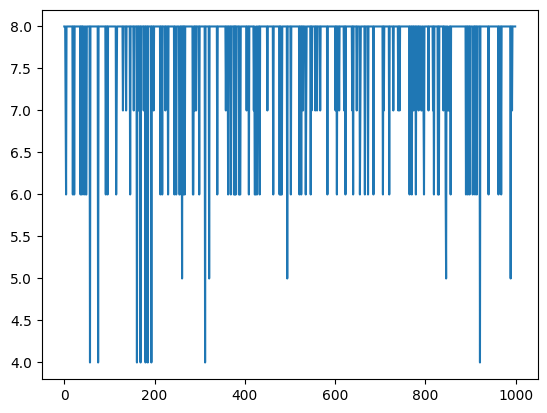

In [13]:
import matplotlib.pyplot as plt
plt.plot(history)

In [14]:
tst_game = GridWorld2((1,5),goal=(0,4),trap=(0,0),start=(0,1))
print(tst_game.display())
for i in range(50):
    state = tuple(np.array(tst_game.display()).flatten())
    action = model.choose_action(state)
    tst_game.move(action)
    print(tst_game.display())
    # for i in tst_game.display():
    #     print(i)
    print(action, tst_game.calculate_reward())
    reward = tst_game.calculate_reward()
    if abs(reward) == 10:
        break

[['-', 'P', ' ', ' ', '+']]
[['-', ' ', 'P', ' ', '+']]
right -1
[['-', ' ', ' ', 'P', '+']]
right -1
[['-', ' ', ' ', ' ', 'P']]
right 10


In [15]:
print(model.q_table)
print(len(model.q_table))
for i in model.q_table:
    print(i)

{('-', 'P', ' ', ' ', '+'): {'left': 2.143999999925952, 'right': 4.599999999999995}, ('-', ' ', 'P', ' ', '+'): {'left': 2.6799999997972037, 'right': 6.999999999999996}, ('-', ' ', ' ', 'P', '+'): {'left': 4.599999991657413, 'right': 9.999999999999996}, ('P', ' ', ' ', ' ', '+'): {'left': 1.4362380930010892, 'right': 2.679999999997093}}
4
('-', 'P', ' ', ' ', '+')
('-', ' ', 'P', ' ', '+')
('-', ' ', ' ', 'P', '+')
('P', ' ', ' ', ' ', '+')
